In [25]:
import pandas as pd
import time

In [26]:
df=pd.read_excel('acoustic_data.xlsx')
df.head()

,,Duration (s),Amplitude,Leakage,Temperature (C),Pressure (kPa),Sensor ID,Battery Level (%),Latitude,Longitude
0,2024-02-19 23:56:09.840,5.939322,0.453278,0,18.025190,131.038083,5,49.680708,39.749898,-98.102464
1,2024-02-19 23:56:10.840,7.436704,0.387024,0,28.585828,137.303486,2,79.974904,33.008239,-94.791252
2,2024-02-19 23:56:11.840,6.424870,0.166573,0,11.992299,152.497044,6,69.310410,30.789699,-96.240057
3,2024-02-19 23:56:12.840,5.903949,0.040551,0,28.906031,175.059502,1,57.976201,37.268780,-97.579003
4,2024-02-19 23:56:13.840,4.812893,0.203621,0,27.389771,133.350747,7,67.160209,39.754241,-93.154473


In [27]:
X = df[['Amplitude', 'Temperature (C)', 'Pressure (kPa)']]
X.head()

,Amplitude,Temperature (C),Pressure (kPa)
0,0.453278,18.025190,131.038083
1,0.387024,28.585828,137.303486
2,0.166573,11.992299,152.497044
3,0.040551,28.906031,175.059502
4,0.203621,27.389771,133.350747


In [28]:
y = df[['Leakage']]
y.head()

,Leakage
0,0
1,0
2,0
3,0
4,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [31]:
X_train.shape

(80, 3)

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [33]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start  = time.time()
history = model.fit(X_train,y_train,epochs=100,batch_size=80, validation_split=0.2)  # Batch Gradient Descent
print(time.time()-start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7812 - loss: 0.5031 - val_accuracy: 0.8125 - val_loss: 0.6401
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7812 - loss: 0.7791 - val_accuracy: 0.8125 - val_loss: 0.4904
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7812 - loss: 0.5029 - val_accuracy: 0.8125 - val_loss: 0.4783
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7812 - loss: 0.5036 - val_accuracy: 0.8125 - val_loss: 0.4971
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7812 - loss: 0.5050 - val_accuracy: 0.8125 - val_loss: 0.4747
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7812 - loss: 0.5099 - val_accuracy: 0.8125 - val_loss: 0.5205
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7969 - loss: 0.5175 - val_accuracy: 0.8125 - val_loss: 0.4812
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7812 - loss: 0.5381 - val_accuracy: 0.8125 - val_los

In [43]:
 # Batch took 6.159 sec but slower per update

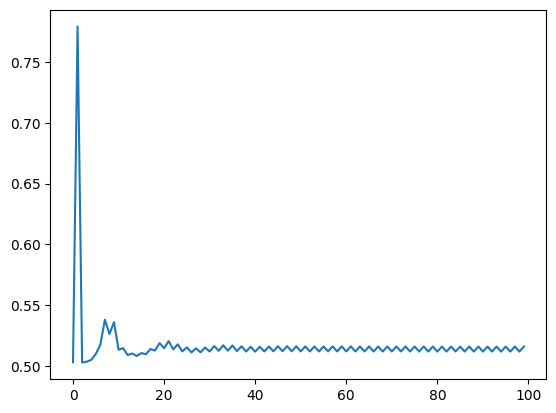

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# Loss is more stable than stochastic

In [47]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start  = time.time()
history = model.fit(X_train,y_train,epochs=100,batch_size=1, validation_split=0.2)  # Stochastic Gradient Descent
print(time.time()-start)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8176 - loss: 0.4973 - val_accuracy: 0.8125 - val_loss: 0.4898
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7071 - loss: 0.6481 - val_accuracy: 0.8125 - val_loss: 0.4774
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8421 - loss: 0.4666 - val_accuracy: 0.3750 - val_loss: 0.7667
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.5926 - val_accuracy: 0.8125 - val_loss: 0.4760
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.6221 - val_accuracy: 0.4375 - val_loss: 0.7300
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.6695 - val_accuracy: 0.8125 - val_loss: 0.5465
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.6066 - val_accuracy: 0.8125 - val_loss: 0.4753
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7825 - loss: 0.5536 - val_accuracy: 0.8125 -

In [44]:
# Stochastic took 23.8580 sec but faster per update

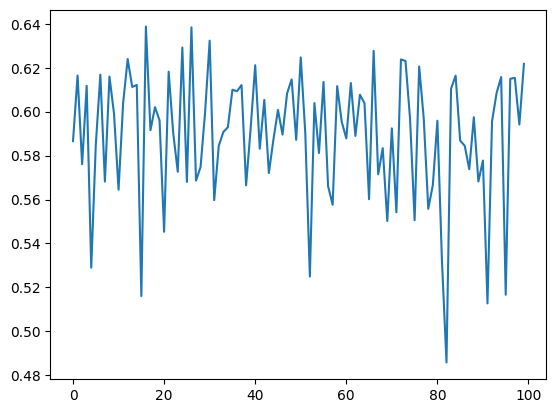

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# Loss is not stable